In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas       # reading the dataset
import numpy as np  # operating the data

import matplotlib.pyplot as plt # visualization
import seaborn as sns ; sns.set() # visualization
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [ ]:
df= pandas.read_csv('admission.csv')
print(df)
print('-'*30)
print(type(df))

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                0.92  
1                0.76  
2  

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df['Research'].nunique()

2

**Read and Visualize**

In [ ]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns; sns.set()        # visualization
# this 'check_df' function is helps the preprocess the reason that I use the  method is easier way to analysis.

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pandas.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
# encoding helps to find categorical variables in this data


def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.

    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.
    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car    

In [ ]:
check_df(df)

##################### Shape #####################
(500, 8)
##################### Types #####################
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object
##################### Head #####################
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  
#############

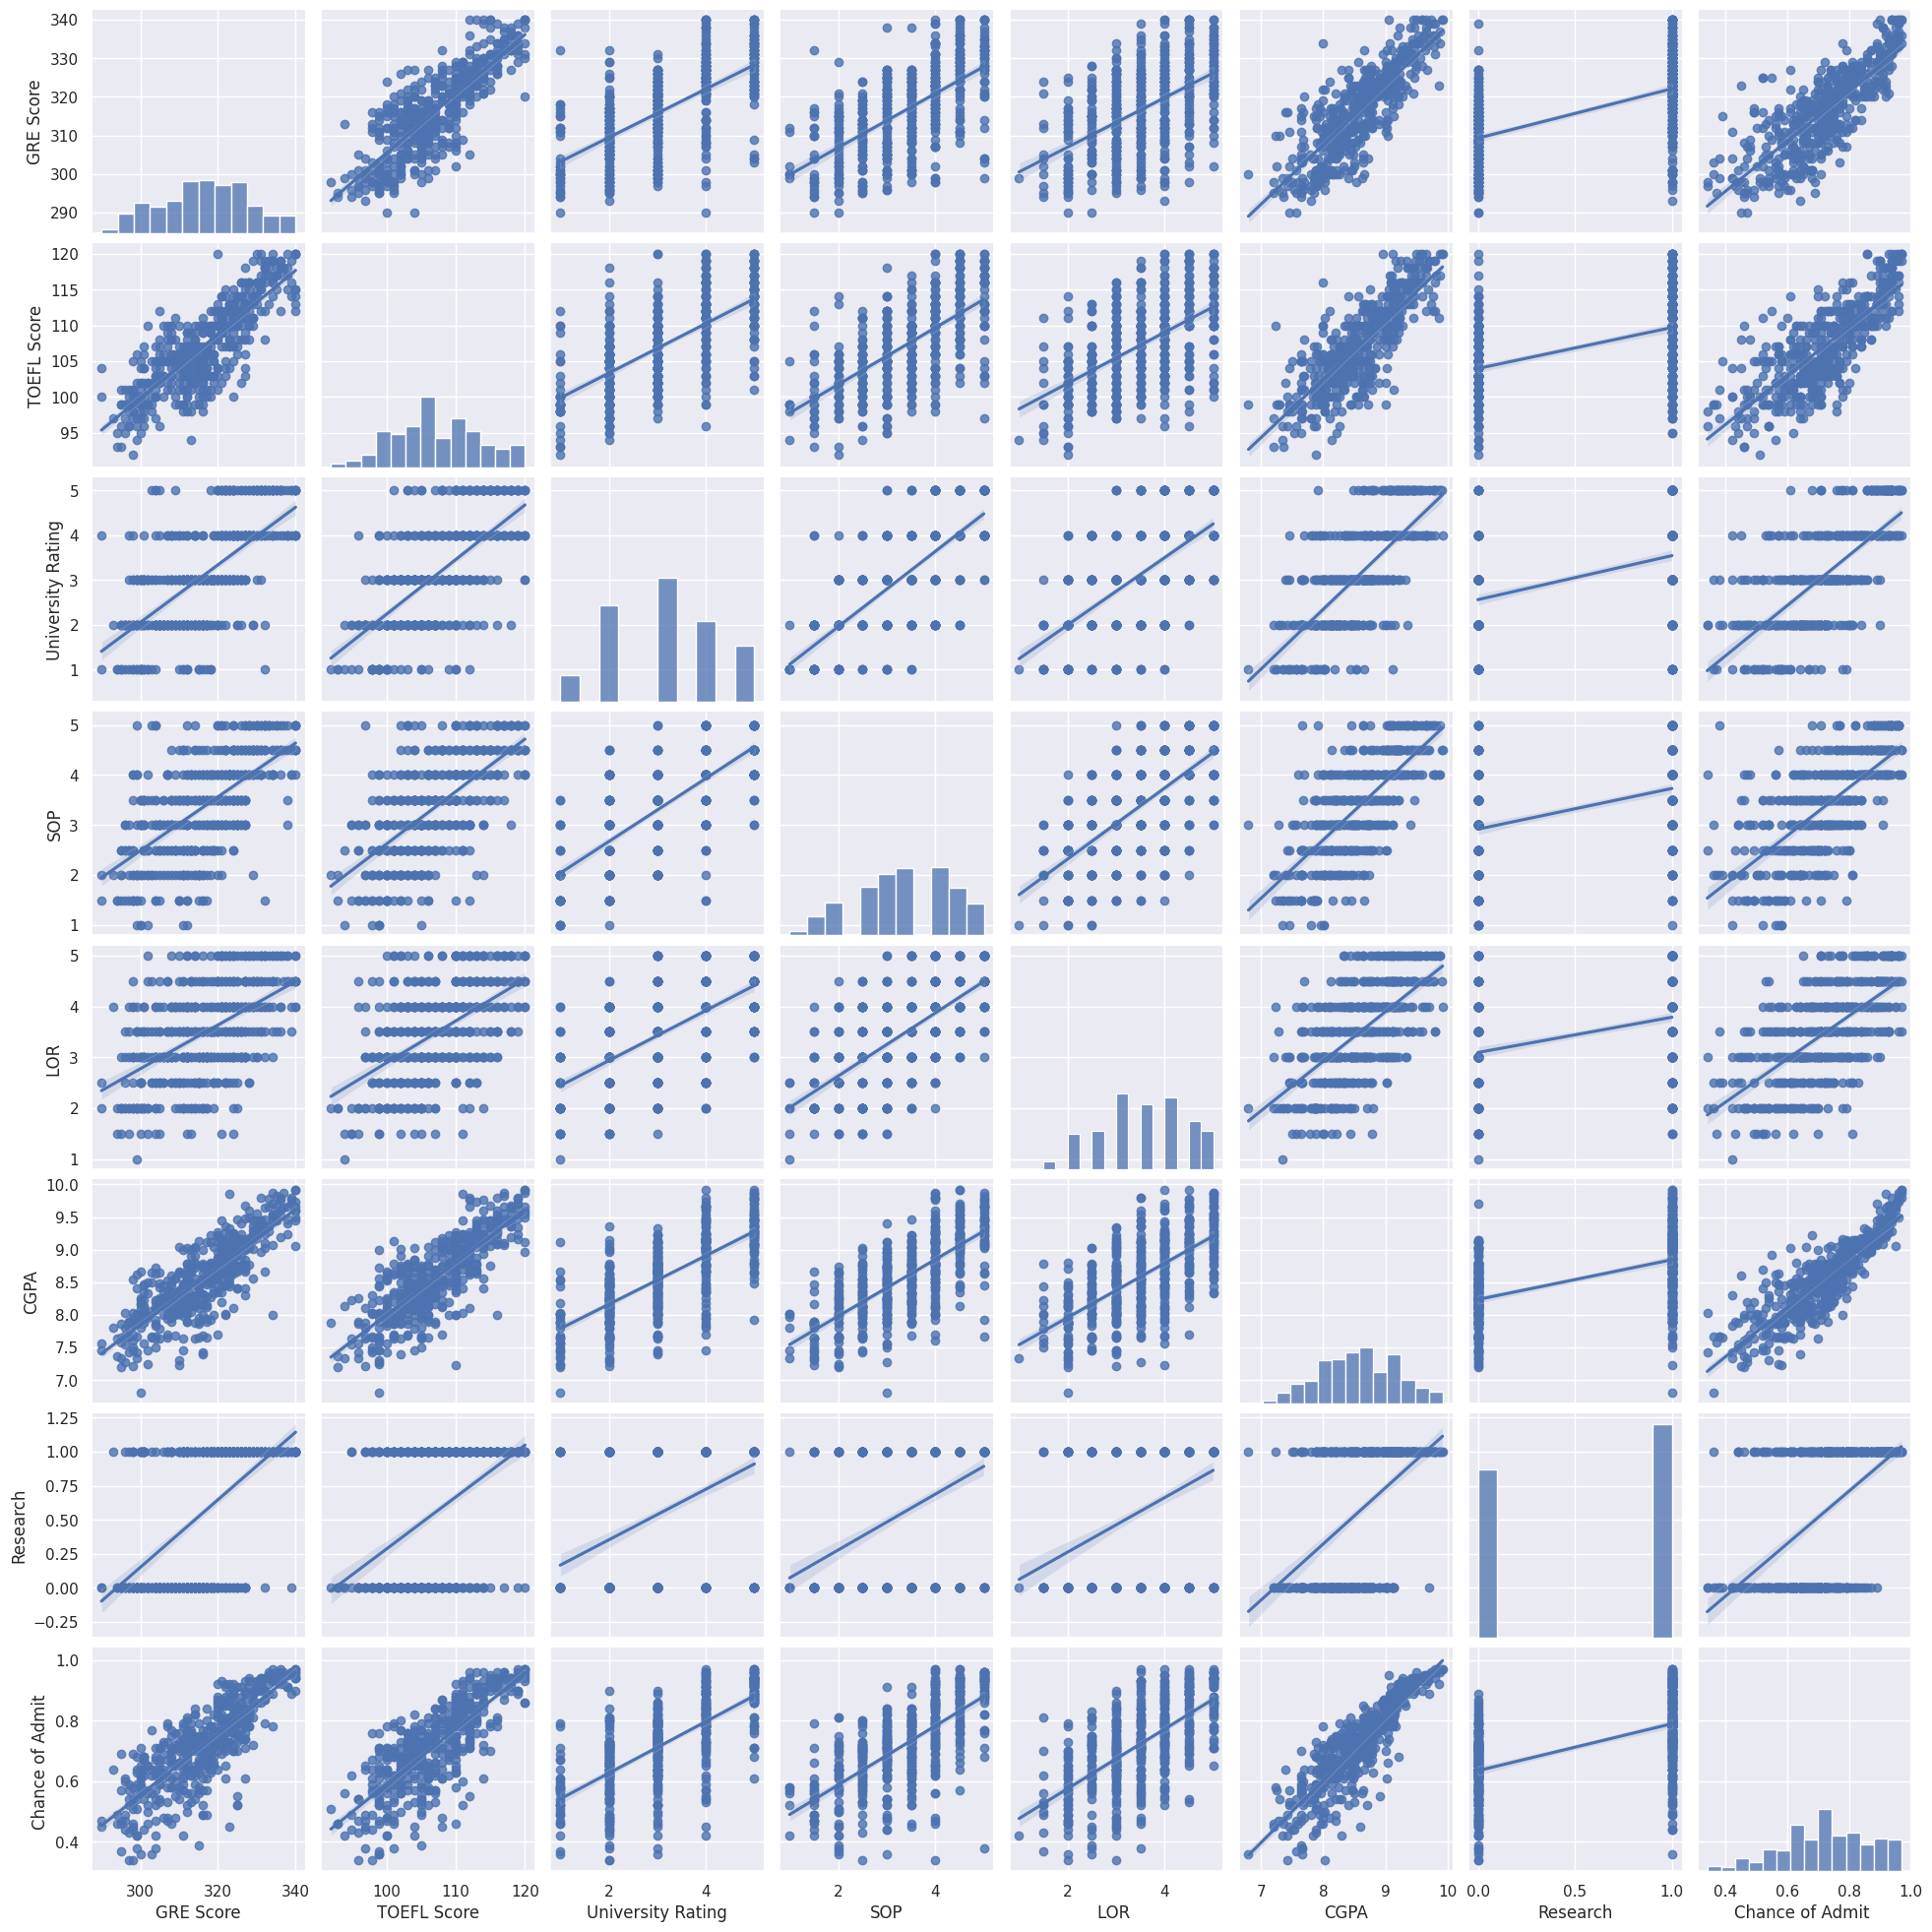

In [ ]:
sns.pairplot(df,kind="reg")

Text(0.5, 1.0, 'CGPA based on Chance of Admit')

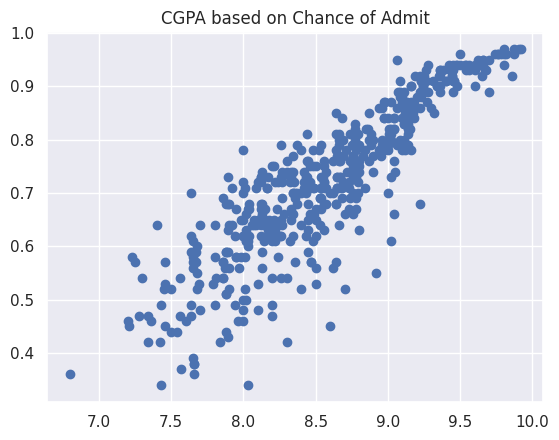

In [ ]:
plt.scatter(df['CGPA'].values,df['Chance of Admit '].values)
plt.title("CGPA based on Chance of Admit")

<Axes: >

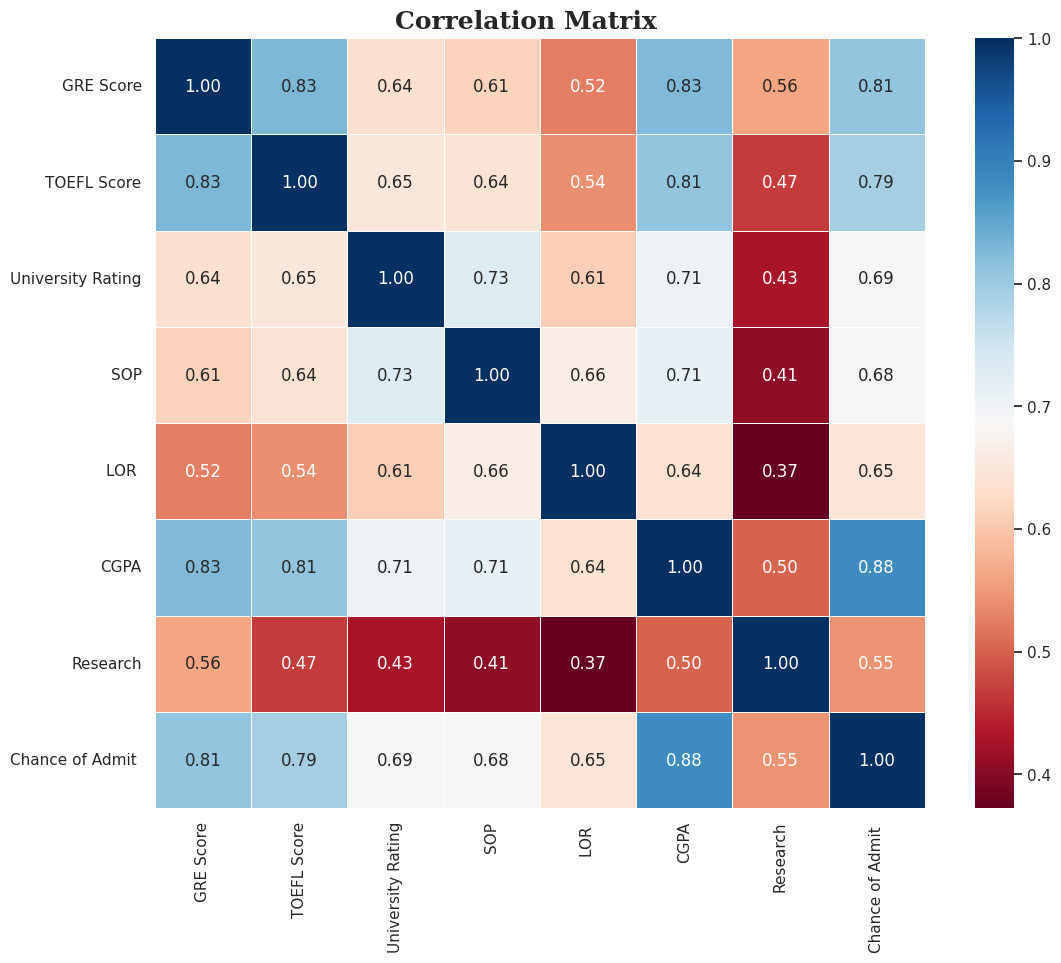

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(13, 10))

# mask = np.triu(np.ones_like(data.corr()))
ax.text(2.5, -0.1, 'Correlation Matrix', fontsize=18, fontweight='bold', fontfamily='serif')
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu', 
            square=True, linewidth=0.7, ax=ax)

In [ ]:
scaler = MinMaxScaler()

features =['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']

df[features] = scaler.fit_transform(df[features])
df[features].head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


In [ ]:
pandas.isnull(df).sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
cat_cols, num_cols, cat_but_cat=grab_col_names(df)

Observations: 500
Variables: 8
cat_cols: 4
num_cols: 4
cat_but_car: 0
num_but_cat: 4


In [ ]:
cat_cols = ['Research']

In [ ]:
df = one_hot_encoder(df, cat_cols, drop_first=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_1.0
0,0.94,0.928571,0.75,0.875,0.875,0.913462,0.920635,1
1,0.68,0.535714,0.75,0.750,0.875,0.663462,0.666667,1
2,0.52,0.428571,0.50,0.500,0.625,0.384615,0.603175,1
3,0.64,0.642857,0.50,0.625,0.375,0.599359,0.730159,1
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.492063,0
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,0.841270,1
496,0.94,0.892857,1.00,1.000,1.000,0.983974,0.984127,1
497,0.80,1.000000,1.00,0.875,1.000,0.884615,0.936508,1
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.619048,0


In [ ]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_1.0
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.810351,0.563398
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.792228,0.467012
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.690132,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.684137,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.645365,0.372526
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.882413,0.501311
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,1.000000,0.545871
Research_1.0,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,0.545871,1.000000


In [ ]:
df.head(15)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_1.0
0,0.94,0.928571,0.75,0.875,0.875,0.913462,0.920635,1
1,0.68,0.535714,0.75,0.750,0.875,0.663462,0.666667,1
2,0.52,0.428571,0.50,0.500,0.625,0.384615,0.603175,1
3,0.64,0.642857,0.50,0.625,0.375,0.599359,0.730159,1
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.492063,0
5,0.80,0.821429,1.00,0.875,0.500,0.814103,0.888889,1
6,0.62,0.607143,0.50,0.500,0.750,0.448718,0.650794,1
7,0.36,0.321429,0.25,0.500,0.750,0.352564,0.539683,0
8,0.24,0.357143,0.00,0.250,0.125,0.384615,0.253968,0
9,0.66,0.571429,0.50,0.625,0.500,0.576923,0.174603,0


In [ ]:
lower_bound = 0.70
df.loc[df["Chance of Admit "] < lower_bound, "Chance of Admit "] = 0
df.loc[df["Chance of Admit "] > lower_bound, "Chance of Admit "] = 1


In [ ]:
df['Chance of Admit '] = df['Chance of Admit '].astype(int)

df.head(15)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_1.0
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1,1
1,0.68,0.535714,0.75,0.750,0.875,0.663462,0,1
2,0.52,0.428571,0.50,0.500,0.625,0.384615,0,1
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1,1
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0,0
5,0.80,0.821429,1.00,0.875,0.500,0.814103,1,1
6,0.62,0.607143,0.50,0.500,0.750,0.448718,0,1
7,0.36,0.321429,0.25,0.500,0.750,0.352564,0,0
8,0.24,0.357143,0.00,0.250,0.125,0.384615,0,0
9,0.66,0.571429,0.50,0.625,0.500,0.576923,0,0


# ***Models***

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X=df.drop(["Chance of Admit "],axis=1)
y=df["Chance of Admit "]

# the aim is find the situation of 'Chance of Admit' in order to 'Research' and 'CGPA'

In [ ]:
#this part helps to choose the which classification is the better for this data 
# using different classification method which is the give best result for that

from sklearn.model_selection import cross_validate
models=[("RF",RandomForestClassifier()),
      ( "GB",GradientBoostingClassifier()),
       ("DT",DecisionTreeClassifier()),
      ( "LG",LogisticRegression(max_iter=1000)),
      ( "KNC",KNeighborsClassifier()),
       ("LGBM",LGBMClassifier()),
       ("XGB",XGBClassifier())]
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## RF ##########
Accuracy: 0.902
Auc: 0.9708
Recall: 0.8242
Precision: 0.9015
F1: 0.849
########## GB ##########
Accuracy: 0.892
Auc: 0.9598
Recall: 0.8242
Precision: 0.8669
F1: 0.8373
########## DT ##########
Accuracy: 0.87
Auc: 0.8489
Recall: 0.783
Precision: 0.834
F1: 0.8019
########## LG ##########
Accuracy: 0.908
Auc: 0.9731
Recall: 0.865
Precision: 0.8757
F1: 0.8652
########## KNC ##########
Accuracy: 0.886
Auc: 0.9412
Recall: 0.8062
Precision: 0.8744
F1: 0.8268
########## LGBM ##########
Accuracy: 0.896
Auc: 0.9675
Recall: 0.8359
Precision: 0.8657
F1: 0.8431
########## XGB ##########
Accuracy: 0.9
Auc: 0.9575
Recall: 0.8533
Precision: 0.8614
F1: 0.8509


In [ ]:
X_train,X_test,y_train,y_test  = train_test_split(X,y, test_size=0.2, )

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

X_test
# from the data 20% is use for test the data others use for traning the test
#the output shows us to numbers for test and tranin

No. of training examples: 400
No. of testing examples: 100


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1.0
10,0.70,0.500000,0.50,0.625,0.750,0.512821,1
87,0.54,0.535714,0.25,0.625,0.500,0.474359,0
297,0.60,1.000000,0.50,0.750,0.875,0.740385,0
151,0.84,0.857143,1.00,1.000,1.000,0.794872,1
51,0.44,0.285714,0.25,0.125,0.625,0.352564,1
...,...,...,...,...,...,...,...
220,0.46,0.392857,0.50,0.750,0.750,0.625000,0
53,0.68,0.714286,0.75,0.750,0.375,0.416667,1
270,0.32,0.464286,0.25,0.375,0.500,0.455128,1
101,0.44,0.464286,0.25,0.375,0.500,0.423077,0


In [ ]:
print(X.columns)  # X veri kümesinin sütun isimlerini yazdırın
print(" ")
print(X_test.columns) 

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research_1.0'],
      dtype='object')
 
Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research_1.0'],
      dtype='object')


In [ ]:
rf_model = RandomForestClassifier().fit(X_train,y_train.values.ravel())
# that creates an example and trains the model on the training dataset (X_train and y_train).


In [ ]:
from sklearn.metrics import  accuracy_score
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.91

# ***HYPER_PARAMETERS***

In [ ]:
#It is used to evaluate the results of the optimized model, which measures its hyperparameters and using cross-evaluation.

from sklearn.model_selection import GridSearchCV

rf_model=RandomForestClassifier(random_state=17)
rf_params={"max_depth":[5,8,None],
           "max_features":[3,5,7,"auto"],
           "min_samples_split":[2,5,8,15,20],
           "n_estimators":[100,200,500]}

rf_best_grd=GridSearchCV(rf_model,rf_params,cv=5,n_jobs=-1,verbose=True).fit(X,y)
print(rf_best_grd.best_params_)

rf_final=rf_model.set_params(**rf_best_grd.best_params_,random_state=17).fit(X,y)
cv_results=cross_validate(rf_final,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])

print(cv_results["test_accuracy"].mean())

print(cv_results["test_f1"].mean())

print(cv_results["test_roc_auc"].mean())

#Using the cross_validate function, the performance of the rf_final model is measured using five-fold cross validation on the X and y datasets.
#Accuracy shows how many of the predictions were correct.
'''
In hyper-parameters result we get three different test
result one of them is the accuracy test result.
Hyperparameters express settings that determine the
performance of a machine learning model.
'''

########### RF ##########
# Accuracy: 0.896
# F1: 0.8379
# Auc: 0.9715

Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'max_depth': 8, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 500}
0.9039999999999999
0.85406788626989
0.9678369865428691


'\nIn hyper-parameters result we get three different test\nresult one of them is the accuracy test result.\nHyperparameters express settings that determine the\nperformance of a machine learning model.\n'

# ***Regression***

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:

df= pandas.read_csv('admission.csv')
print(df)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                0.92  
1                0.76  
2  

In [ ]:
x=df[[ 'CGPA']]
y=df[['Chance of Admit ']]

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:

'''model.intercept_[0]
model.coef_[0][0]'''

'model.intercept_[0]\nmodel.coef_[0][0]'

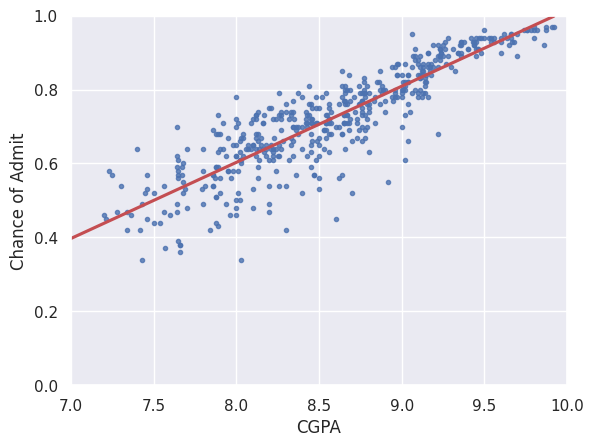

In [ ]:
g = sns.regplot(x=x, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")
g.set_ylabel("Chance of Admit")
g.set_xlabel("CGPA")
plt.xlim(7, 10)
plt.ylim(0,1)
plt.show()

In [ ]:
print(x.columns)  # X veri kümesinin sütun isimlerini yazdırın
print(x_test.columns) 

Index(['CGPA'], dtype='object')
Index(['CGPA'], dtype='object')


In [ ]:
x_train,x_test,y_train,y_test  = train_test_split(x,y, test_size=0.5 )

print(f"No. of training examples: {x_train.shape[0]}")
print(f"No. of testing examples: {x_test.shape[0]}")

x_test

No. of training examples: 250
No. of testing examples: 250


,CGPA
307,9.00
210,9.06
473,8.15
23,9.70
189,9.08
...,...
330,8.66
44,9.40
13,8.00
35,9.20


In [ ]:
Ypredic=model.predict(x_test)

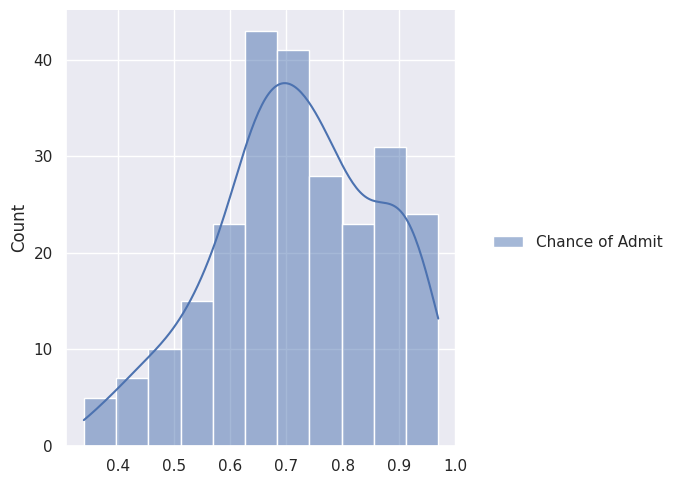

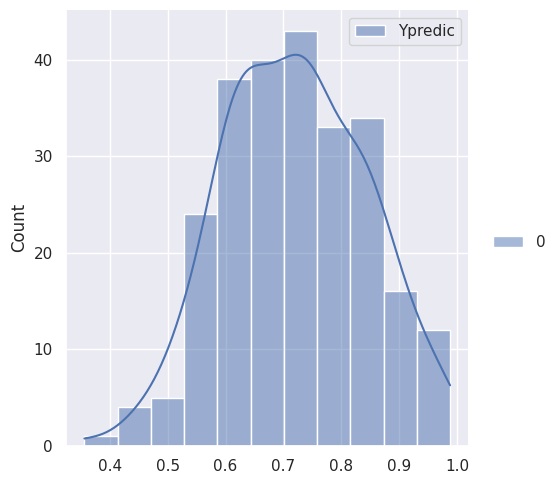

In [ ]:

sns.displot(y_test, kde=True, label='y_test')
sns.displot(Ypredic, kde=True, label='Ypredic')
plt.legend()

In [ ]:
df=y_test.copy()
df['Predicted Values']=Ypredic
df.columns=['Actual Values','Predicted Values']
df

,Actual Values,Predicted Values
307,0.80,0.808960
210,0.79,0.821315
473,0.67,0.633927
23,0.95,0.953105
189,0.88,0.825434
...,...,...
330,0.80,0.738947
44,0.91,0.891329
13,0.62,0.603039
35,0.88,0.850145


In [ ]:
r2_score(y_test,Ypredic)

0.7855167388569921

In [ ]:
model.score(x_test,y_test)

0.7855167388569921

In [1]:
y_pred = model.predict(x)
print("deviation rate : ")
mean_absolute_error(y, y_pred)

NameError: ignored

r2_score(y_test, Ypredic) kodu, gerçek y_test değerleri ile modelin tahmin ettiği Ypredic değerleri arasındaki R-kare skorunu hesaplar. R-kare skoru, bir regresyon modelinin veriye ne kadar iyi uydurulduğunu ölçer ve 0 ile 1 arasında bir değer alır. 1'e ne kadar yakınsa, modelin veriyi daha iyi açıkladığı anlamına gelir. Negatif değerler ise modelin veriyi tahmin etmekten daha kötü performans gösterdiğini gösterir.

model.score(X_test, y_test) kodu ise, modelin test veri seti üzerindeki doğruluk skorunu hesaplar. Bu skor, sınıflandırma modelleri için doğru sınıflandırma oranını, regresyon modelleri için ise varyans açıklama oranını ifade eder. Skorun değeri 0 ile 1 arasında değişir ve 1'e ne kadar yakınsa, modelin test verisinde daha iyi performans gösterdiği anlamına gelir. Negatif değerler, modelin test verisini tahmin etmekten daha kötü bir performans sergilediğini gösterir.

Her iki kod da modelin performansını değerlendirmek için kullanılır. Ancak hesaplama yöntemleri ve sonuçları farklıdır. r2_score daha spesifik bir regresyon performans metriği iken, model.score genel bir performans metriğidir ve kullanılan model tipine göre farklı skorlar verir.

# ***HYPER_PARAMETERS***

In [ ]:
from sklearn.linear_model import Ridge

# Ridge regresyon modeli için alpha hiperparametresini belirleme
alpha_values = [0.01, 0.1, 1.0, 10.0]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

best_alpha = None
best_mse = float('inf')  # Başlangıçta en iyi MSE'yi en yüksek değere ayarlayalım

# Farklı alpha değerleri ile modeli eğitme ve performansı değerlendirme
for alpha in alpha_values:
    # Ridge regresyon modelini oluşturma
    model = Ridge(alpha=alpha)
    
    # Modeli eğitme
    model.fit(x_train, y_train)
    
    # Modelin tahminlerini yapma
    y_pred = model.predict(x_test)
    
    # MSE değerini hesaplama
    mse = mean_squared_error(y_test, y_pred)
    
    # En iyi MSE değerini kontrol etme
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

# En iyi hiperparametre değerini yazdırma
print("Best alpha value:", best_alpha)


Best alpha value: 0.01


In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid Search ile hiperparametre araması yapma
parameters = {'alpha': [0.01, 0.1, 1.0, 10.0]}
model = Ridge()
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# En iyi hiperparametre değerini yazdırma
print("Best alpha value:", grid_search.best_params_['alpha'])


Best alpha value: 0.1


In [ ]:
#Random Search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Random Search ile hiperparametre araması yapma
param_dist = {'alpha': uniform(loc=0.01, scale=10.0)}
model = Ridge()
random_search = RandomizedSearchCV(model, param_dist, n_iter=4, scoring='neg_mean_squared_error', cv=5)
random_search.fit(x_train, y_train)

# En iyi hiperparametre değerini yazdırma
print("Best alpha value", random_search.best_params_['alpha'])


Best alpha value 4.923267714201774


In [ ]:
#Cross Validation

from sklearn.model_selection import cross_val_score

# Ridge regresyon modeli için cross-validation kullanarak performansı değerlendirme
model = Ridge(alpha=best_alpha)
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

# MSE değerlerinin ortalamasını alarak performansı değerlendirme
mean_mse = -scores.mean()
print("Cross-Validation MSE:", mean_mse)


Cross-Validation MSE: 0.004353342216898147


In [ ]:
# Grid Search veya Random Search ile bulunan en iyi hiperparametre değerlerini kullanarak modeli eğitme
model = Ridge(alpha=best_alpha)
model.fit(x_train, y_train)


Ridge(alpha=0.01)

# ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X = df.drop('Chance of Admit ' , axis = 1)
y = df['Chance of Admit ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

In [ ]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
#from sklearn.metrics import mean_squared_error,r2_score
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test , y_test)
print("mean squared error :", mse)
print ('R-squared :' , r2)


mean squared error : 0.007955999999999998
R-squared : 1.0


# ***HYPER_PARAMETERS***

In [ ]:
'''

# Decision Tree Regressor modeli oluşturma
model = DecisionTreeRegressor()

# Ayarlanacak hiperparametreler ve değer aralıkları
params = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV ile en iyi hiperparametreleri bulma
grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_train, y_train)

# En iyi hiperparametre değerlerine erişme
best_params = grid_search.best_params_
print("En iyi hiperparametreler:", best_params)

# En iyi hiperparametrelerle modeli tekrar eğitme
model = DecisionTreeRegressor(**best_params)
model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Hata hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
'''

'\n\n# Decision Tree Regressor modeli oluşturma\nmodel = DecisionTreeRegressor()\n\n# Ayarlanacak hiperparametreler ve değer aralıkları\nparams = {\n    \'max_depth\': [None, 5, 10, 15],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\n# GridSearchCV ile en iyi hiperparametreleri bulma\ngrid_search = GridSearchCV(model, params, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# En iyi hiperparametre değerlerine erişme\nbest_params = grid_search.best_params_\nprint("En iyi hiperparametreler:", best_params)\n\n# En iyi hiperparametrelerle modeli tekrar eğitme\nmodel = DecisionTreeRegressor(**best_params)\nmodel.fit(X_train, y_train)\n\n# Test verileri üzerinde tahmin yapma\ny_pred = model.predict(X_test)\n\n# Hata hesaplama\nmse = mean_squared_error(y_test, y_pred)\nprint("Mean Squared Error (MSE):", mse)\n'

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'criterion': ['absolute_error', 'squared_error', 'poisson', 'friedman_mse'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Score: 0.7535767999288705


In [ ]:
# Decision Tree regresörünü oluşturun
model = DecisionTreeRegressor()

# GridSearchCV ile Grid Search yapın
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi skoru yazdırın
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.7498167953529029
